In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#### Read the Data

In [3]:
df = pd.read_csv('Bank Full.csv', sep=';')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### EDA

In [6]:
df.duplicated().value_counts()

False    45211
Name: count, dtype: int64

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

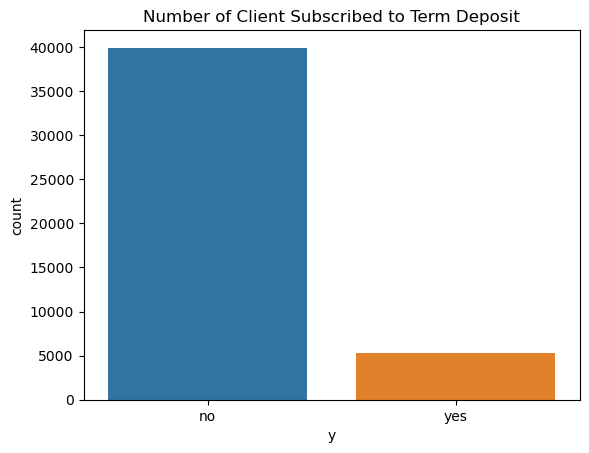

In [8]:
sns.countplot(x='y',data=df)
plt.title('Number of Client Subscribed to Term Deposit')
plt.show()

Text(0, 0.5, 'Job')

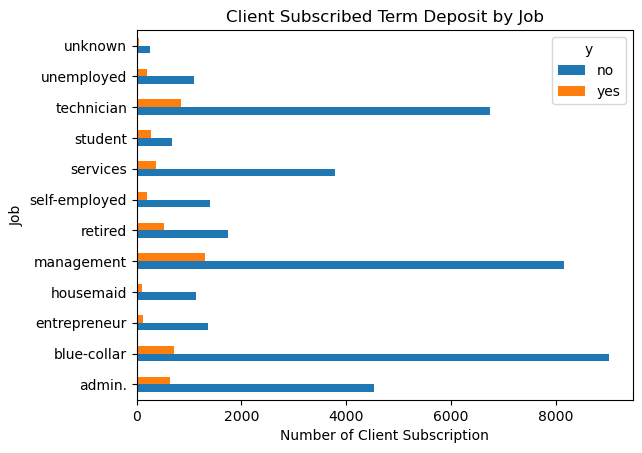

In [9]:
%matplotlib inline
pd.crosstab(df.job,df.y).plot(kind='barh')
plt.title('Client Subscribed Term Deposit by Job')
plt.xlabel('Number of Client Subscription')
plt.ylabel('Job')

Text(0, 0.5, 'Marital Status')

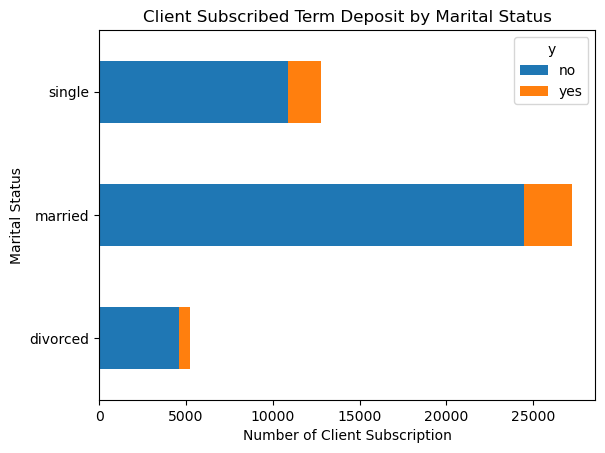

In [10]:
pd.crosstab(df.marital,df.y).plot(kind='barh',stacked=True)
plt.title('Client Subscribed Term Deposit by Marital Status')
plt.xlabel('Number of Client Subscription')
plt.ylabel('Marital Status')

There is large variation within each of the classes, and hence seems to be an important predictor variable.

Text(0, 0.5, 'Education')

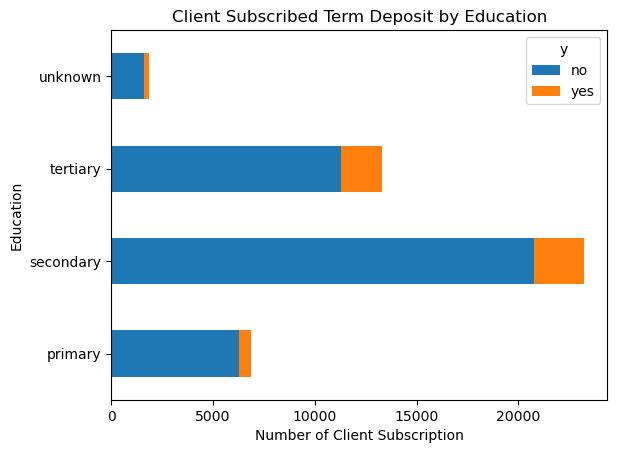

In [11]:
pd.crosstab(df.education,df.y).plot(kind='barh',stacked=True)
plt.title('Client Subscribed Term Deposit by Education')
plt.xlabel('Number of Client Subscription')
plt.ylabel('Education')

Text(0, 0.5, 'Month')

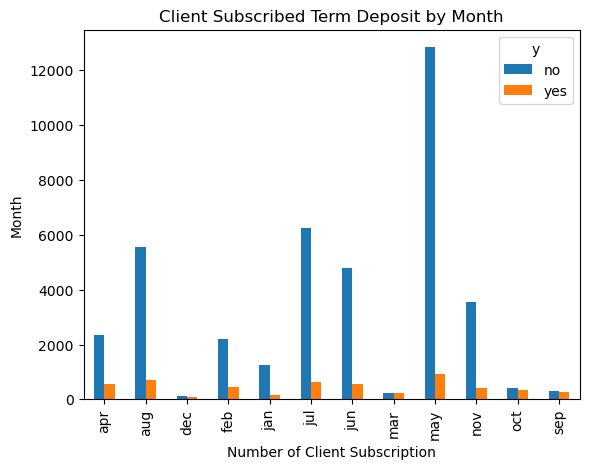

In [12]:
pd.crosstab(df.month,df.y).plot(kind='bar')
plt.title('Client Subscribed Term Deposit by Month')
plt.xlabel('Number of Client Subscription')
plt.ylabel('Month')

The number of  subscripton seems to be Seasonal.

Text(0, 0.5, 'Poutcome')

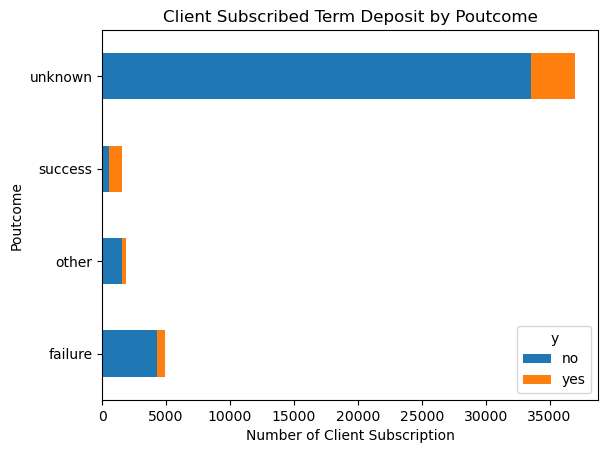

In [13]:
pd.crosstab(df.poutcome,df.y).plot(kind='barh',stacked=True)
plt.title('Client Subscribed Term Deposit by Poutcome')
plt.xlabel('Number of Client Subscription')
plt.ylabel('Poutcome')

In [14]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

In [15]:
df['job']=label_encoder.fit_transform(df['job'])
df['marital']=label_encoder.fit_transform(df['marital'])
df['education']=label_encoder.fit_transform(df['education'])
df['default']=label_encoder.fit_transform(df['default'])
df['housing']=label_encoder.fit_transform(df['housing'])
df['loan']=label_encoder.fit_transform(df['loan'])
df['contact']=label_encoder.fit_transform(df['contact'])
df['month']=label_encoder.fit_transform(df['month'])
df['poutcome']=label_encoder.fit_transform(df['poutcome'])
df['y']=label_encoder.fit_transform(df['y'])

In [16]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [17]:
X =df.iloc[:,0:16]

In [18]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3


In [19]:
y = df.iloc[:,16]

In [20]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

In [21]:
X.shape, y.shape

((45211, 16), (45211,))

#### Split the Data

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [24]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((36168, 16), (9043, 16), (36168,), (9043,))

#### Build The Model

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
clf = LogisticRegression()

In [27]:
clf.fit(X_train, y_train)

LogisticRegression()

#### Make Predictions forTraining Data and Calculate the Metric

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
yhat_train = clf.predict(X_train)

In [31]:
confusion_matrix(y_train, yhat_train)

array([[31387,   583],
       [ 3453,   745]], dtype=int64)

In [32]:
print(classification_report(y_train,yhat_train))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31970
           1       0.56      0.18      0.27      4198

    accuracy                           0.89     36168
   macro avg       0.73      0.58      0.60     36168
weighted avg       0.86      0.89      0.86     36168



In [33]:
train_mse = mean_squared_error(y_train, yhat_train)

In [34]:
train_rmse = np.sqrt(train_mse)

In [35]:
train_mse , train_rmse

(0.11159035611590357, 0.33405142735199256)

#### Make Predictions forTesting Data and Calculate the Metrics

In [36]:
yhat_test = clf.predict(X_test)

In [37]:
confusion_matrix(y_test, yhat_test)

array([[7803,  149],
       [ 900,  191]], dtype=int64)

In [38]:
print(classification_report(y_test,yhat_test))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.56      0.18      0.27      1091

    accuracy                           0.88      9043
   macro avg       0.73      0.58      0.60      9043
weighted avg       0.86      0.88      0.86      9043



In [39]:
test_mse = mean_squared_error(y_test, yhat_test)

In [40]:
test_rmse = np.sqrt(test_mse)

In [41]:
test_mse,test_rmse

(0.11600132699325445, 0.34058967540613216)